In [ ]:
# !pip install seaborn

In [24]:
# import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import re
import seaborn as sb
%matplotlib inline

In [63]:
# Read in instagram data from kaggle of over 1000 users into pandas dataframe
user_df = pd.read_csv('Instagram_Data.csv')
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 17.7+ MB


In [26]:
# Plotting Likes relationship with
# Number of comments and Days since posted
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sb.regplot(data = user_df, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

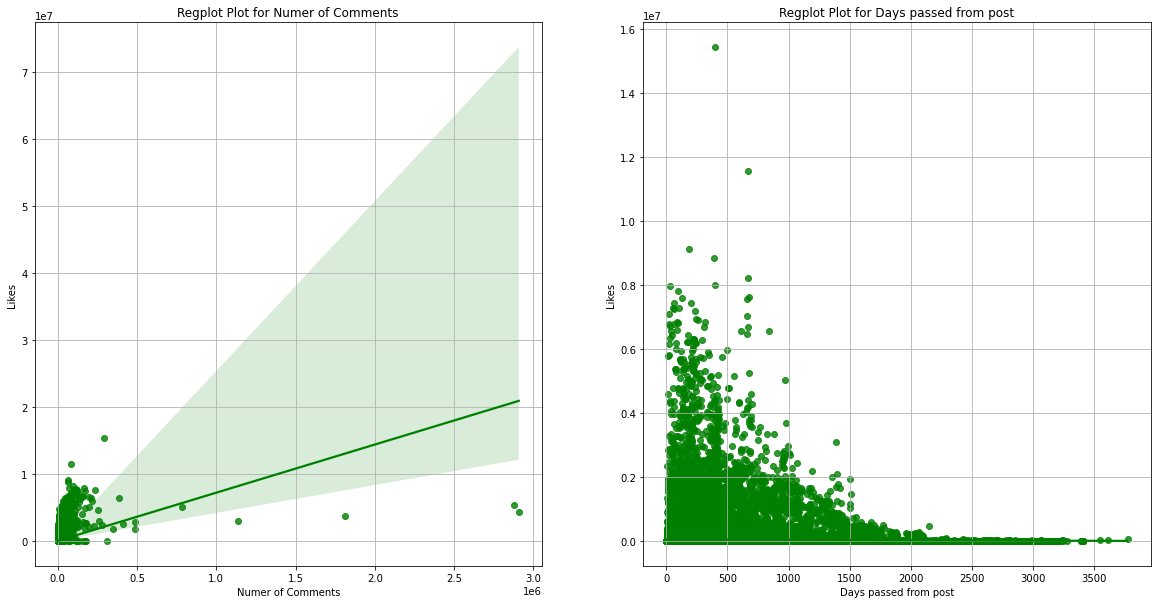

In [27]:
PlotDataGiveConclusion2(['Numer of Comments', 'Days passed from post'])

In [28]:
# develop a prediction model
# in the given data set we can have 2 features
# the NUmber of comments and time since Posted and our 
# target is number of likes.
featureVector = np.array(user_df[['Numer of Comments', 'Days passed from post']], dtype = 'float32')
targets = np.array(user_df['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

targets = targets/maxValLikes
targets

Max value of target is 15445692.0


array([3.2759945e-05, 2.4926045e-05, 2.4149129e-05, ..., 1.2948594e-07,
       9.0640162e-07, 5.8268677e-07], dtype=float32)

In [37]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [38]:
# Gradeint Boosting Regressor
# Gradient Boosting algorithm is used to generate an ensemble model by combining 
# the weak learners or weak predictive models. 
# Gradient boosting algorithm can be used to train models for both regression and classification problem. 
# Gradient Boosting Regression algorithm is used to fit the model which predicts the continuous value.
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xTrain, yTrain)

GradientBoostingRegressor()

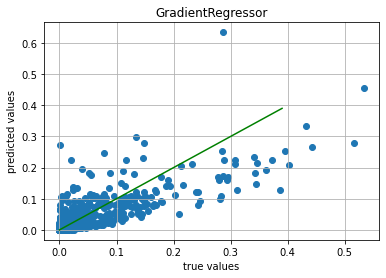

In [39]:
# doing Some Benchmarks
predictions = model.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [51]:
print(f"{model.score(xTrain, yTrain)}")
print(f"{model.score(xTest, yTest)}")

0.7581124125618863
0.6901656586035967


In [40]:
user_df.describe()

,User uuid,Likes,Days passed from post,Likes Score,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
count,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000
mean,546.316948,4.298806e+04,447.477510,0.270961,3.578045,5.622285e+02,2019.412107,6.764814,15.694219,13.396435,28.741737
std,317.200142,2.604648e+05,492.620418,0.210007,6.877008,1.201380e+04,1.374731,3.753390,8.824645,7.385343,17.678904
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,273.000000,1.340000e+02,107.000000,0.100000,0.000000,4.000000e+00,2019.000000,3.000000,8.000000,7.000000,13.000000
50%,540.000000,1.064000e+03,260.000000,0.220000,0.000000,2.300000e+01,2020.000000,7.000000,16.000000,16.000000,29.000000
75%,829.000000,1.074300e+04,612.000000,0.390000,3.000000,1.357500e+02,2020.000000,10.000000,23.000000,20.000000,44.000000
max,1089.000000,1.544569e+07,3775.000000,1.000000,31.000000,2.907644e+06,2021.000000,12.000000,31.000000,23.000000,59.000000


In [41]:
user_df.head()

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51


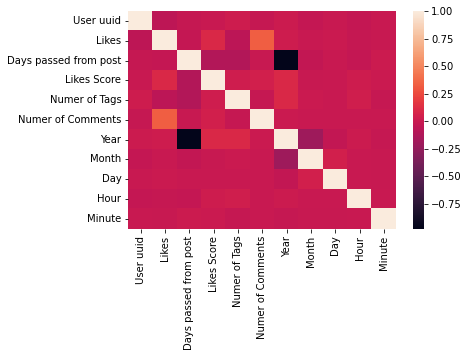

In [43]:
sb.heatmap(user_df.corr())

In [61]:
def PredictionsWithConstantFollowers(model, numberComments , scaller, maxVal):
    comments = numberComments * np.ones(100)
    days = np.arange(1, 500)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = comments
    featureVector [:, 1] = days
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(days, predictions)
    plt.scatter(days, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('Days since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(comments) +' comments')
    plt.show()

In [62]:
PredictionsWithConstantFollowers(model, 250, stdSc, maxValLikes)

ValueError: could not broadcast input array from shape (100) into shape (24)